In [1]:
import pandas as pd
df = pd.read_excel("fanpage.xlsx")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9975 entries, 0 to 9974
Data columns (total 11 columns):
id          9975 non-null object
context     9968 non-null object
time        9975 non-null object
shares      9975 non-null int64
likes       9975 non-null int64
love        9975 non-null int64
wow         9975 non-null int64
haha        9975 non-null int64
angry       9975 non-null int64
sad         9975 non-null int64
comments    9975 non-null int64
dtypes: int64(8), object(3)
memory usage: 857.3+ KB


In [3]:
df.head(2)

,id,context,time,shares,likes,love,wow,haha,angry,sad,comments
0,124616330906800_1560501197318299,阿娘威！披羊皮的狼？竟大口嚼小雞\n#要打統編：小編真的是快嚇死了...😬😬\n\n影片來源...,2017-06-05T03:09:40+0000,560,1144,11,757,21,292,86,589
1,124616330906800_1560454417322977,被黑了！李毓芬演唱「大落拍」 網友卻意外發現「亮點」\n#條紋編：這一段應該是昨天的亮點表演...,2017-06-05T03:00:00+0000,29,2521,41,10,19,0,3,60


# 資料前處理

處理遺失值

In [4]:
df['context'] = df['context'].fillna("無")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9975 entries, 0 to 9974
Data columns (total 11 columns):
id          9975 non-null object
context     9975 non-null object
time        9975 non-null object
shares      9975 non-null int64
likes       9975 non-null int64
love        9975 non-null int64
wow         9975 non-null int64
haha        9975 non-null int64
angry       9975 non-null int64
sad         9975 non-null int64
comments    9975 non-null int64
dtypes: int64(8), object(3)
memory usage: 857.3+ KB


計算總按讚數量

In [6]:
df['likes_count'] = df['likes']+df['love']+df['wow']+df['haha']+df['angry']+df['sad']

In [7]:
df.head(1)

,id,context,time,shares,likes,love,wow,haha,angry,sad,comments,likes_count
0,124616330906800_1560501197318299,阿娘威！披羊皮的狼？竟大口嚼小雞\n#要打統編：小編真的是快嚇死了...😬😬\n\n影片來源...,2017-06-05T03:09:40+0000,560,1144,11,757,21,292,86,589,2311


整理時間資料

In [8]:
df['time'][0]

'2017-06-05T03:09:40+0000'

In [9]:
df['time'] = df['time'].str.replace("T",'').str.replace("-",'').str.replace(':','').str.split('+').str[0]

In [10]:
df['time'][0]

'20170605030940'

In [11]:
df['time'] = pd.to_datetime(df['time'],format='%Y%m%d%H%M%S')

In [12]:
df['time'][0]

Timestamp('2017-06-05 03:09:40')

抓取的資料時間為倫敦時區，因此需+8小時轉為台灣時區

In [13]:
import datetime
df['time'] = df['time']+datetime.timedelta(hours = 8)

In [14]:
df['time'][0]

Timestamp('2017-06-05 11:09:40')

取出小時

In [15]:
df['hour'] = df["time"].dt.hour
df['hour'] = df['hour'].astype('object')

取出星期

In [28]:
df['weekday'] = df["time"].dt.weekday
df['weekday'] = df['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9975 entries, 0 to 9974
Data columns (total 14 columns):
id             9975 non-null object
context        9975 non-null object
time           9975 non-null datetime64[ns]
shares         9975 non-null int64
likes          9975 non-null int64
love           9975 non-null int64
wow            9975 non-null int64
haha           9975 non-null int64
angry          9975 non-null int64
sad            9975 non-null int64
comments       9975 non-null int64
likes_count    9975 non-null int64
hour           9975 non-null object
weekday        9975 non-null object
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage: 1.1+ MB


In [18]:
df.head(1)

,id,context,time,shares,likes,love,wow,haha,angry,sad,comments,likes_count,hour,weekday
0,124616330906800_1560501197318299,阿娘威！披羊皮的狼？竟大口嚼小雞\n#要打統編：小編真的是快嚇死了...😬😬\n\n影片來源...,2017-06-05 11:09:40,560,1144,11,757,21,292,86,589,2311,11,Monday


取出小編名

In [20]:
curator = []
for i in df['context'].str.split('#').str[1].str.split('：').str[0]:
    try:
        if i[-1] == '編':
            curator.append(i)
        else:
            curator.append(None)
    except:
        curator.append(None)

In [21]:
df['curator'] = pd.DataFrame(curator)

In [39]:
df.head(1)

,id,context,time,shares,likes,love,wow,haha,angry,sad,comments,likes_count,curator
0,124616330906800_1560501197318299,阿娘威！披羊皮的狼？竟大口嚼小雞\n#要打統編：小編真的是快嚇死了...😬😬\n\n影片來源...,2017-06-05T03:09:40+0000,560,1144,11,757,21,292,86,589,2311,要打統編


# 描述性統計

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

mac版本

In [26]:
font = FontProperties(fname=r"/System/Library/Fonts/STHeiti Light.ttc")

windows版本

In [ ]:
font = FontProperties(fname=r"C:/Windows/Fonts/msjh.ttc")

連續型資料統計指標

In [159]:
df.describe()

,shares,likes,love,wow,haha,angry,sad,comments,likes_count
count,9975.000000,9975.000000,9975.000000,9975.000000,9975.000000,9975.000000,9975.000000,9975.000000,9975.000000
mean,277.510877,3125.289925,115.573634,118.844411,262.752381,147.826065,111.721704,585.611830,3882.008120
std,1171.178025,6770.009492,500.730071,323.255901,1105.812423,942.289195,967.558397,2545.403304,8278.568139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,384.000000,7.000000,8.000000,3.000000,0.000000,0.000000,10.000000,465.000000
50%,40.000000,1017.000000,15.000000,28.000000,11.000000,1.000000,1.000000,52.000000,1246.000000
75%,160.000000,2795.500000,43.000000,95.000000,77.000000,10.000000,8.000000,254.000000,3515.000000
max,39140.000000,144475.000000,11394.000000,8474.000000,30265.000000,30751.000000,48997.000000,64206.000000,156850.000000


類別型資料統計

In [23]:
df['curator'].value_counts()

B編         410
內編         397
條紋編        383
悠悠編        299
惡魔在身編      276
哩厝編        276
M編         275
哈姆編        266
周二編        266
閃編         265
西瓜挖大編      248
車部編        239
吐司切編       230
皓編         207
內褲穿反編      186
右編         166
其中一編       159
蹲在路編       150
大編         147
小皮編        144
曉寶寶編       139
看我72編      138
要打統編       132
單單編        129
卡卡編        122
隨便亂編       108
香魚編        107
藍編         105
少在那編        91
提娜編         87
          ... 
什麼編         11
安安幾歲住哪編     10
有邊讀編         9
奴才編          8
BG編          7
羅伯編          7
人間四月編        7
女大十八編        7
看我這編         6
格格編          6
星編           6
拍厝編          5
懸崖編          4
婕妮編          3
朵在你身編        3
夏威夷海編        3
山的哪編         3
某p編          3
海角天編         3
森林編          2
多多編          2
呆編           2
防側漏編         1
法力無編         1
頭髮分編         1
條文編          1
樂編           1
遠在天編         1
淡水河編         1
魚骨編          1
Name: curator, Length: 86, dtype: int64

計算小編數量

In [42]:
len(df['curator'].value_counts().index)

86

發文數量前10名的小編

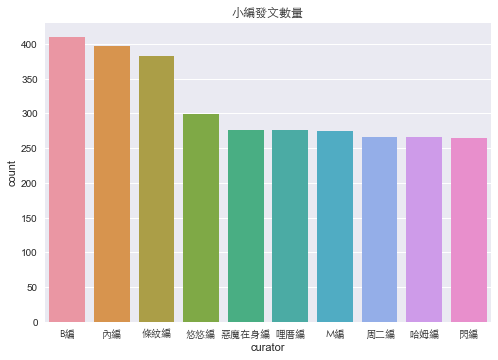

In [164]:
sns.countplot(data=df, x='curator', order=df['curator'].value_counts().iloc[:10].index)
plt.xticks(fontproperties=font,size=10)
plt.title("小編發文數量",fontproperties=font,size=12)
plt.show()

按讚平均前10的小編

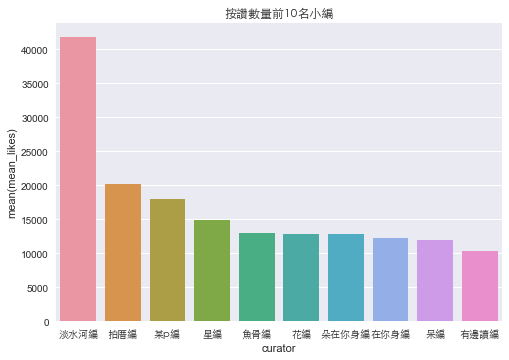

In [117]:
likes_avg = []
for i in df['curator'].value_counts().index:
    likes_avg.append([i,(df[df['curator']==i])["likes_count"].mean()])
df2 = pd.DataFrame(likes_avg, columns=['curator','mean_likes'])
df3 = df2.sort_values('mean_likes',ascending=False).head(10)
sns.barplot(x='curator', y='mean_likes', data=df3)
plt.xticks(fontproperties=font,size=10)
plt.title("按讚數量前10名小編",fontproperties=font,size=12)
plt.show()

探討時間因子

發文時間統計

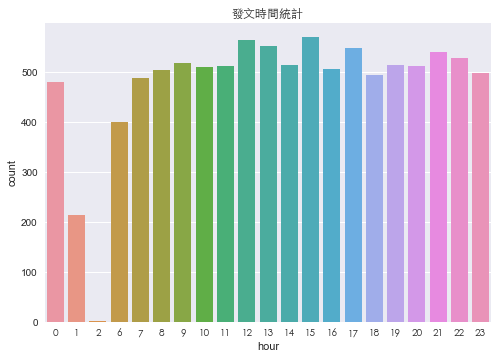

In [195]:
sns.countplot(data=df, x='hour')
plt.xticks(fontproperties=font,size=10)
plt.title("發文時間統計",fontproperties=font,size=12)
plt.show()

各時段發文按讚成效

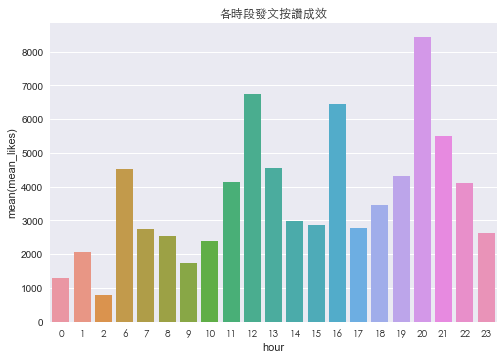

In [168]:
likes_avg_hour = []
for i in df['hour'].value_counts().index:
    likes_avg_hour.append([i,(df[df['hour']==i])["likes_count"].mean()])
df4 = pd.DataFrame(likes_avg_hour, columns=['hour','mean_likes'])
sns.barplot(x='hour', y='mean_likes', data=df4)
plt.xticks(fontproperties=font,size=10)
plt.title("各時段發文按讚成效",fontproperties=font,size=12)
plt.show()

發文星期統計

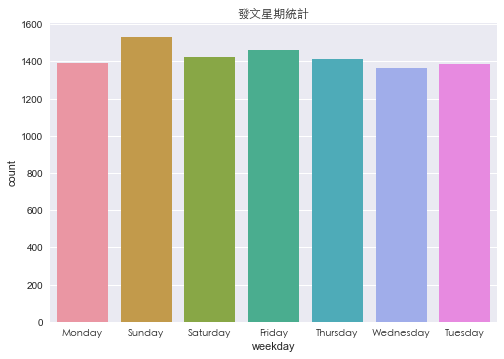

In [29]:
sns.countplot(data=df, x='weekday')
plt.xticks(fontproperties=font,size=10)
plt.title("發文星期統計",fontproperties=font,size=12)
plt.show()

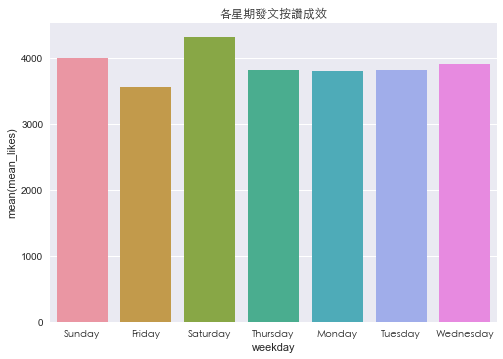

In [177]:
likes_avg_week = []
for i in df['weekday'].value_counts().index:
    likes_avg_week.append([i,(df[df['weekday']==i])["likes_count"].mean()])
df4 = pd.DataFrame(likes_avg_week, columns=['weekday','mean_likes'])
sns.barplot(x='weekday', y='mean_likes', data=df4)
plt.xticks(fontproperties=font,size=10)
plt.title("各星期發文按讚成效",fontproperties=font,size=12)
plt.show()

發文數量，星期&小時熱點圖 Heatmap

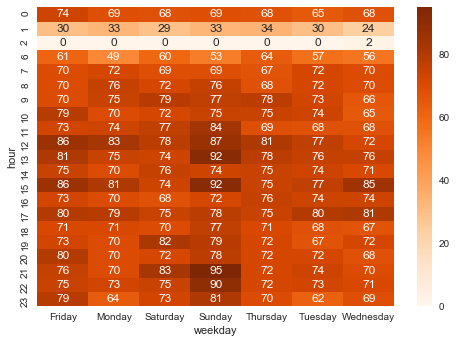

In [196]:
df6 = pd.crosstab(df["hour"], df["weekday"])
sns.heatmap(df6, annot=True,cmap="Oranges")
plt.show()

按讚數量，星期&小時熱點圖 Heatmap

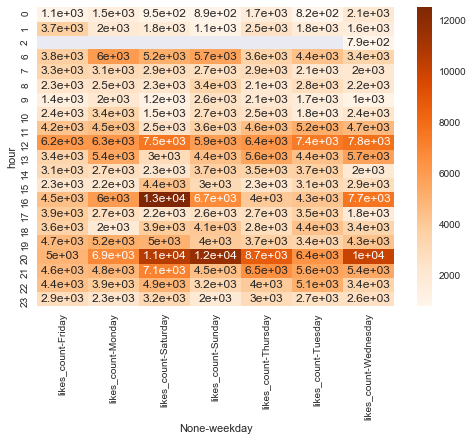

In [206]:
df7 = pd.pivot_table(df, index=['hour'], columns=['weekday'], values=['likes_count'])
sns.heatmap(df7, annot=True,cmap="Oranges")
plt.show()

匯出整理好的資料

In [208]:
df.to_excel("fanpage_clean.xlsx", index=False)